<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 2: Conceptos Generales</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 2.6: Conceptos del Procesamiento de Imágenes</center></font>
<font face = "Times New Roman" size = "4"><center>Subtema b: Fundamentos de OpenCV</center></font></b>
</div>

## FUNDAMENTOS DE OPENCV

Para comenzar el **Procesamiento de Imágenes** empleando la librería **OpenCV**, se deben importar las librerías a ser empleadas. En este caso se emplearán las siguientes:

* **OpenCV**: Por medio de `import cv2`. 
* **NumPy**: Por medio de `import numpy as np`.
* **Matplotlib**: Por medio de `from matplotlib import pyplot as plt`.

A continuación se lee el archivo `Lily.jpg` con la imágen de ***Lily***, el cual es un archivo en formato `JPG` con un mapeo de color del tipo `RGB`. Para ello se empleará el método `.imread()` donde el parámetro de entrada corresponde al nombre del archivo. 

***Nota:*** Cuando se utilizó la librería **SciKit-Image**, el proceso fue similar empleando `io.imread()`.

Finalmente, se verificarán algunos detalles de la imagen:

* La cantidad total de pixeles contenidos en la imagen por medio del método `.size`.
* El tamaño de la matriz que contiene a la imagen por medio del método `.shape`.
* EL tipo de datos contenidos en la imagen por medio del método `.dtype`.

Hasta el momento, se sabe que la imagen en formato `JPG` contiene datos de 8 bits, esto es, en un rango de ***0*** a ***255*** con valores enteros solamente. 

In [1]:
#Importación de Librerías
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

#Lectura de la Imagen desde un archivo JPG
Lily = cv2.imread("./Imagenes/Lily.jpg")           

#Impresión de valores de la imagen
print("La cantidad de pixeles en la imagen es:", Lily.size)
print("El tamaño de la imagen es:", Lily.shape)
print("El tipo de datos contenidos en la imagen es:", Lily.dtype)

La cantidad de pixeles en la imagen es: 786432
El tamaño de la imagen es: (512, 512, 3)
El tipo de datos contenidos en la imagen es: uint8


A continuación se muestra la imagen haciendo uso del método `.imshow()` de la librería **Matplotlib** como ya se ha realizado en previas ocasiones.

Podrá notarse que la imagen resultante no es similar a la imagen original. Se esperaba una imagen de colores brillantes, pero lo que se obtiene es una imagen con cierto matiz azulado.

Esto es debido a que **OpenCV** y **Matplotlib** tienen diferentes órdenes de colores primarios:

* **Matplotlib** lee las imágenes en formato `RGB`.
* **OpenCV** lee las imágenes en formato `BGR`.

Por lo tanto, cuando se lee un archivo a través de **OpenCV**, se está leyendo como si tuviera canales en el orden de `azul`, `verde` y `rojo`. Al mostrar la imagen usando **Matplotlib**, el orden de los canales `rojo` y `azul` están invertidos y por ello ese tinte azul en el resultado.

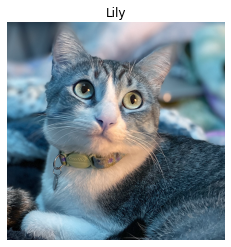

In [2]:
#Impresión de la Imagen
plt.imshow(Lily)
plt.axis('off')
plt.title("Lily")
plt.show()
#plt.imsave('./Imagenes/Lily_BGR.jpg', Lily)

Para leer los canales (bandas) de manera individual, se emplea el método `.split()` donde el parámetro es simplemente la variable que contiene la matriz con la información de la imagen. Posteriormente se muestran los canales de manera individual y en orden `RGB`: 

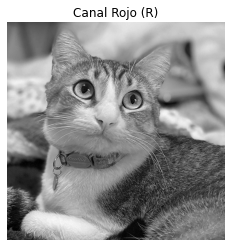

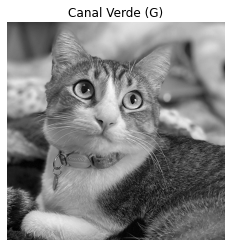

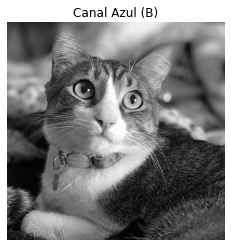

In [3]:
#Valores de los Canales contenidos en la imagen BGR
Lily_b, Lily_g, Lily_r = cv2.split(Lily)

#Impresión de la Banda R
plt.imshow(Lily_r, cmap='gray')        
plt.axis('off')
plt.title("Canal Rojo (R)")
#plt.imsave('./Imagenes/Lily_R.jpg', Lily_r, cmap='gray')
plt.show()

#Impresión de la Banda G
plt.imshow(Lily_g, cmap='gray')        
plt.axis('off')
plt.title("Canal Verde (G)")
#plt.imsave('./Imagenes/Lily_G.jpg', Lily_g, cmap='gray')
plt.show()

#Impresión de la Banda B
plt.imshow(Lily_b, cmap='gray')        
plt.axis('off')
plt.title("Canal Azul (B)")
#plt.imsave('./Imagenes/Lily_B.jpg', Lily_b, cmap='gray')
plt.show()

### Operaciones en Espacios de Color
En **OpenCV** es sencillo convertir imágenes entre varios ***Espacios de Color*** (***colorspaces***).

Como primer paso, la imagen en formato `BGR` contenida en la matriz `Lily` puede ser convertida a su formato `RGB` empleando el método `.merge()` de la siguiente manera:

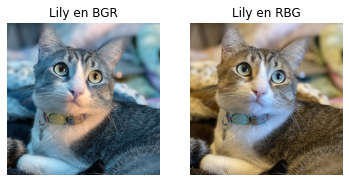

In [4]:
#Modificación del Espacio de Color
Lily_RGB = cv2.merge([Lily_r, Lily_g, Lily_b])

#Impresión de las Imágenes 
plt.subplot(1,2,1), plt.imshow(Lily), plt.axis('off'), plt.title("Lily en BGR")
plt.subplot(1,2,2), plt.imshow(Lily_RGB), plt.axis('off'), plt.title("Lily en RBG")
#plt.imsave('./Imagenes/Lily_RGB.jpg', Lily_RGB)
plt.show()

**OpenCV** también cuenta con un método que proporciona los cambios entre distintos ***Espacios de Color*** sin necesidad de separar (***split***) y combinar (***merge***) las bandas de manera individual. Por lo mismo suele ser más rápido y con menor consumo de memoria. 

El método es `.cvtColor(a,b)`, el cual recibe dos argumentos:

* El argumento `a`: Indica el nombre de la variable que contiene los datos de la imagen a ser convertidos.
* El argumento `b`: Indica el tipo de conversión que se realizará entre ***Espacios de Color***.

La descripción detallada del método `.cvtColor()` puede ser consultada [en esta liga](https://docs.opencv.org/3.4/db/d64/tutorial_js_colorspaces.html).

**OpenCV** tiene alrededor de 300 (296 para ser exactos) tipos de conversiones entre ***Espacios de Color*** los cuales pueden ser consultados a detalle [en esta liga](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0).

Se ejemplificarán tres conversiones del ***Espacio de Color*** empleando el método `.cvtColor()` para este ejemplo:

1. Conversión de BGR a RGB empleando el método `.COLOR_BGR2RGB`.
2. Conversión de BGR a escala de grises empleando el método `.COLOR_BGR2GRAY`. La imagen resultante contiene solo 1 banda de información (pancromática).
2. Conversión de BGR a HSV empleando el método `.COLOR_BGR2HSV`. Esta conversión se refiere a Tono (***Hue***), Saturación (***Saturation***) y Brillo (***Value***) que son muy utilizados en transmisiones de video en formatos **NTSC** y **PAL**. La imagen resultante contiene 3 bandas de información (una para cada nivel HSV).

Esto es:

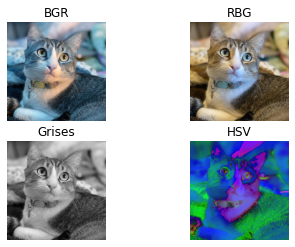

El tamaño de la imagen en Escala de Grises es: (512, 512)
El tamaño de la imagen HSV es: (512, 512, 3)


In [5]:
#Modificación del Espacio de Color
Lily_RGB = cv2.cvtColor(Lily, cv2.COLOR_BGR2RGB)
Lily_GS = cv2.cvtColor(Lily, cv2.COLOR_BGR2GRAY)
Lily_HSV = cv2.cvtColor(Lily, cv2.COLOR_BGR2HSV)

#Impresión de las Imágenes 
plt.subplot(2,2,1), plt.imshow(Lily), plt.axis('off'), plt.title("BGR")
plt.subplot(2,2,2), plt.imshow(Lily_RGB), plt.axis('off'), plt.title("RBG")
plt.subplot(2,2,3), plt.imshow(Lily_GS, cmap='gray'), plt.axis('off'), plt.title("Grises")
plt.subplot(2,2,4), plt.imshow(Lily_HSV), plt.axis('off'), plt.title("HSV")
#plt.imsave('./Imagenes/Lily_GS.jpg', Lily_GS, cmap='gray')
#plt.imsave('./Imagenes/Lily_HSV.jpg', Lily_HSV)
plt.show()

#Impresión de valores de las Imágenes
print("El tamaño de la imagen en Escala de Grises es:", Lily_GS.shape)
print("El tamaño de la imagen HSV es:", Lily_HSV.shape)

### Obtención y Modificación de Datos en la Imagen
Como se había revisado previamente, las imágenes en **Python** y en específico cuando se manejan a través de **OpenCV**, son arreglos de **NumPy**, y debido a ello se pueden realizar operaciones a nivel de los pixeles de manera rápida y eficiente. 

El manejo de los valores de los pixeles también pueden emplearse para extraer zonas específicas dentro de la imagen. Por ejemplo, para mostrar el ojo derecho de `Lily` se puede indicar la ventana de pixeles que lo contienen:

* Renglones: pixeles del 130 al 190.
* Columnas: pixeles del 150 al 210.

Utilizando la imagen de `Lily` en formato `RGB`, esto es:

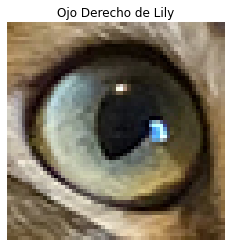

El tamaño de la imagen del ojo derecho de Lily es: (60, 60, 3)


In [6]:
#Valores de los Canales contenidos en la imagen RGB
Lily_ojo = Lily_RGB[130:190, 150:210, :]

#Impresión de las Imágenes
plt.imshow(Lily_ojo)        
plt.axis('off')
plt.title("Ojo Derecho de Lily")
plt.show()
#plt.imsave('./Imagenes/Lily_Ojo.jpg', Lily_ojo)
print("El tamaño de la imagen del ojo derecho de Lily es:", Lily_ojo.shape)

Debido a que las imágenes son arreglos matriciales de **NumPy**, para contar con una nueva variable con la información de la imagen se pueden realizar dos acciones:

1. Se vuelve a cargar la imagen en la nueva variable con el método `.imread()` de **OpenCV**.
2. Se hace una copia de una varible ya existente con el método `.copy()` de **NumPy**.

En este caso se hará una copia para ejemplificar el uso del método `.copy()`. En esta nueva variable se insertará el ojo derecho de Lily para modificar los valores contenidos en su matriz. Para ello, la ventana que contiene el ojo se agregará en las coordenadas *(100,220)* que ya han sido identificadas previamente. Esto es:

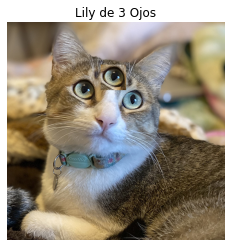

In [7]:
#Duplicado de una Imagen
Lily_New = Lily_RGB.copy()

#Modificación de Valores    
Lily_New[100:100 + Lily_ojo.shape[0], 220:220 + Lily_ojo.shape[1]] = Lily_ojo

#Impresión de las Imágenes
plt.imshow(Lily_New)  
plt.axis('off')
plt.title("Lily de 3 Ojos")
plt.show()
#plt.imsave('./Imagenes/Lily_3ojos.jpg', Lily_New)

<div class="alert alert-block alert-success">
<b>.: Fin del Subtema :.</b>
</div>

***Liga de aceso al siguiente Subtema:*** 
<br>[c. Imágenes Multiespectrales](c.%20Imagenes%20Multiespectrales.ipynb)